In [45]:
%reload_ext autoreload
%load_ext autotime
%reload_ext line_profiler
%autoreload 2

import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)
import sys
sys.path.insert(0,'../../')

import pandas as pd
import numpy as np

pd.options.display.max_columns = 999
pd.options.display.max_rows = 1999
pd.options.display.max_colwidth = 100

import glob

from scripts.manipulate import normalize_cols, padronize_str
from scripts.orcamento_sp import get_despesas, get_receita
from scripts.orcamento_sp import generic_group

import plotly.express as px

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 111 ms (started: 2021-04-20 11:19:21 -03:00)


### Despesas

In [17]:
## CHECA SE ARQUIVOS SAO CONSISTENTES ENTRE OS ANOS
files = glob.glob('../../data/orcamento_consolidado/execucao/*.csv')
df_despesa, all_cols = get_despesas(files)

2010
../../data/orcamento_consolidado/execucao/orcamento_executado_2010.csv.csv
2011
../../data/orcamento_consolidado/execucao/orcamento_executado_2011.csv
2012
../../data/orcamento_consolidado/execucao/orcamento_executado_2012.csv
2013
../../data/orcamento_consolidado/execucao/orcamento_executado_2013.csv
2014
../../data/orcamento_consolidado/execucao/orcamento_executado_2014.csv
2015
../../data/orcamento_consolidado/execucao/orcamento_executado_2015.csv
2016
../../data/orcamento_consolidado/execucao/orcamento_executado_2016.csv
2017
../../data/orcamento_consolidado/execucao/orcamento_executado_2017.csv
2018
../../data/orcamento_consolidado/execucao/orcamento_executado_2018.csv
2019
../../data/orcamento_consolidado/execucao/orcamento_executado_2019.csv
2020
../../data/orcamento_consolidado/execucao/orcamento_executado_2020.csv
2021
../../data/orcamento_consolidado/execucao/orcamento_executado_2021.csv
time: 8.87 s (started: 2021-04-20 10:58:36 -03:00)


In [18]:
df_despesa.groupby(by=['ano'],as_index=False).sum()[['ano','dotacao_inicial']].sort_values(by='ano', ascending=False)

,ano,dotacao_inicial
11,2021,2.772163e+11
10,2020,2.697748e+11
9,2019,2.608308e+11
8,2018,2.459258e+11
7,2017,2.342283e+11
6,2016,2.341096e+11
5,2015,2.310481e+11
4,2014,2.121914e+11
3,2013,1.928443e+11
2,2012,1.740679e+11


time: 91 ms (started: 2021-04-20 10:58:45 -03:00)


In [19]:
df_despesa['funcao'].unique()

array(['01 - LEGISLATIVA', '02 - JUDICIARIA', '12 - EDUCACAO',
       '10 - SAUDE', '19 - CIENCIA E TECNOLOGIA',
       '23 - COMERCIO E SERVICOS', '13 - CULTURA',
       '09 - PREVIDENCIA SOCIAL', '20 - AGRICULTURA', '26 - TRANSPORTE',
       '14 - DIREITOS DA CIDADANIA', '21 - ORGANIZACAO AGRARIA',
       '08 - ASSISTENCIA SOCIAL', '06 - SEGURANCA PUBLICA',
       '04 - ADMINISTRACAO', '28 - ENCARGOS ESPECIAIS', '11 - TRABALHO',
       '16 - HABITACAO', '18 - GESTAO AMBIENTAL',
       '03 - ESSENCIAL A JUSTICA', '17 - SANEAMENTO', '25 - ENERGIA',
       '27 - DESPORTO E LAZER', '24 - COMUNICACOES',
       '99 - RESERVA DE CONTINGENCIA', '22 - INDUSTRIA', '15 - URBANISMO'],
      dtype=object)

time: 39.9 ms (started: 2021-04-20 10:58:45 -03:00)


In [38]:
### elementos da previdencia
funcoes_interesse = [
    '10 - SAUDE',
    '12 - EDUCACAO',
    '19 - CIENCIA E TECNOLOGIA',
    '09 - PREVIDENCIA SOCIAL',
    '06 - SEGURANCA PUBLICA',
]
mask = df_despesa['funcao'].isin(funcoes_interesse)
generic_group(
    df_despesa[mask], 
    group_cols=['ano','funcao'],
    numeric_cols=['dotacao_inicial'],
    sort_cols = ["funcao", "ano"]
)

,ano,funcao,dotacao_inicial
59,2021,19 - CIENCIA E TECNOLOGIA,1.513406e+09
54,2020,19 - CIENCIA E TECNOLOGIA,1.965812e+09
49,2019,19 - CIENCIA E TECNOLOGIA,1.877747e+09
44,2018,19 - CIENCIA E TECNOLOGIA,1.706173e+09
39,2017,19 - CIENCIA E TECNOLOGIA,1.641950e+09
34,2016,19 - CIENCIA E TECNOLOGIA,1.587571e+09
29,2015,19 - CIENCIA E TECNOLOGIA,1.516750e+09
24,2014,19 - CIENCIA E TECNOLOGIA,1.436620e+09
19,2013,19 - CIENCIA E TECNOLOGIA,1.447495e+09
14,2012,19 - CIENCIA E TECNOLOGIA,1.388150e+09


time: 125 ms (started: 2021-04-20 11:15:57 -03:00)


In [41]:
grupo = {
    '31' : 'PESSOAL E ENCARGOS SOCIAIS',
    '32' : 'JUROS E ENCARGOS DA DIVIDA',
    '33' : 'OUTRAS DESPESAS CORRENTES',
    '44' : 'INVESTIMENTOS',
    '45' : 'INVERSOES FINANCEIRAS',
    '46' : 'AMORTIZACAO DE DIVIDA',
    '99' : 'RESERVA DE CONTINGENCIA'
}

df_despesa['grupo'] = df_despesa['elemento'].apply(lambda x: x[:2]).replace(grupo)

generic_group(
    df_despesa, 
    group_cols=['ano','grupo'],
    numeric_cols=['dotacao_inicial'],
    sort_cols = ["grupo", "ano"]
)

,ano,grupo,dotacao_inicial
84,2021,RESERVA DE CONTINGENCIA,5.100000e+07
77,2020,RESERVA DE CONTINGENCIA,4.999996e+07
70,2019,RESERVA DE CONTINGENCIA,5.000000e+07
63,2018,RESERVA DE CONTINGENCIA,4.650000e+07
56,2017,RESERVA DE CONTINGENCIA,2.000000e+07
49,2016,RESERVA DE CONTINGENCIA,1.000000e+07
42,2015,RESERVA DE CONTINGENCIA,1.000000e+07
35,2014,RESERVA DE CONTINGENCIA,1.000000e+07
28,2013,RESERVA DE CONTINGENCIA,1.000000e+07
21,2012,RESERVA DE CONTINGENCIA,1.000000e+07


time: 221 ms (started: 2021-04-20 11:17:01 -03:00)


## Receita

In [94]:
files = glob.glob('../../data/orcamento_consolidado/receita_arrecadada/*.csv')
df_receita, receita_cols = get_receita(files)
# df_receita = df_receita[df_receita['ano']==2020]
df_receita['id_receita'] = df_receita['receita'].apply(lambda x: x.split('-')[0].strip())

2010
../../data/orcamento_consolidado/receita_arrecadada/orcamento_arrecadado_2010.csv
2011
../../data/orcamento_consolidado/receita_arrecadada/orcamento_arrecadado_2011.csv
2012
../../data/orcamento_consolidado/receita_arrecadada/orcamento_arrecadado_2012.csv
2013
../../data/orcamento_consolidado/receita_arrecadada/orcamento_arrecadado_2013.csv
2014
../../data/orcamento_consolidado/receita_arrecadada/orcamento_arrecadado_2014.csv
2015
../../data/orcamento_consolidado/receita_arrecadada/orcamento_arrecadado_2015.csv
2016
../../data/orcamento_consolidado/receita_arrecadada/orcamento_arrecadado_2016.csv
2017
../../data/orcamento_consolidado/receita_arrecadada/orcamento_arrecadado_2017.csv
2018
../../data/orcamento_consolidado/receita_arrecadada/orcamento_arrecadado_2018.csv
2019
../../data/orcamento_consolidado/receita_arrecadada/orcamento_arrecadado_2019.csv
2020
../../data/orcamento_consolidado/receita_arrecadada/orcamento_arrecadado_2020.csv
2021
../../data/orcamento_consolidado/recei

In [98]:
df_receita['origem'] = df_receita['id_receita'].apply(lambda x: x[:2])

time: 59.6 ms (started: 2021-04-20 14:53:09 -03:00)


In [190]:
df_receita[df_receita['origem']=='72'].head(2)

,orgao,gestao,unidade_gestora,fonte_de_recursos,receita,arrecadado_ate_16_04_2021,ano,id_receita,origem
2066,20000 - SECRETARIA DA FAZENDA,20065 - SAO PAULO PREVIDENCIA - SPPREV,202601 - SAO PAULO PREVIDENCIA - SPPREV,004 - REC.PROPRIO-ADM.IND.-DOT.INIC.CR.SUPL.,72102902 - CONTRIBUICOES PATRONAIS - ATIVO MILITAR,5.380459e+08,2010,72102902,72
2067,20000 - SECRETARIA DA FAZENDA,20065 - SAO PAULO PREVIDENCIA - SPPREV,202601 - SAO PAULO PREVIDENCIA - SPPREV,004 - REC.PROPRIO-ADM.IND.-DOT.INIC.CR.SUPL.,72102980 - CONTRIBUICOES PATRONAIS-ATIVO CIVIL-P.EXECUT,2.918875e+09,2010,72102980,72


time: 54.9 ms (started: 2021-04-20 17:26:32 -03:00)


In [191]:
origem_receita = {
    '11':'Receita Tributária',
    '12':'Receita de Contribuições',
    '13':'Receita Patrimonial',
    '14':'Receita Agropecuária',
    '15':'Receita Industrial',
    '16':'Receita de Serviços',
    '17':'Transferências Correntes',
    '19':'Outras Receitas Correntes',
    '21':'Operações de Crédito',
    '22':'Alienação de Bens',
    '23':'Amortização de Empréstimos',
    '24':'Traferência de Capital',
    '25':'Outras Receitas de Capital do Estado',
    '29':'Demais Receitas de Capital',
    '72':'Receitas de Contribuições - Intra-Orçamentárias',
    '74':'',
    '76':'Receitas Intra-Orçamentárias com Receitas de Serviços',
    '77':'',
    '79':'Receitas Intra-Orçamentárias com Outras Receitas Correntes',
    '82':'Alienação de Bens',
    '85':'Outras Receitas de Capital',
    '89':''
}

time: 56 ms (started: 2021-04-20 17:33:03 -03:00)


In [103]:
df_receita['origem'].sort_values().unique().tolist()

['11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '19',
 '21',
 '22',
 '23',
 '24',
 '25',
 '29',
 '72',
 '74',
 '76',
 '77',
 '79',
 '82',
 '85',
 '89']

time: 64.3 ms (started: 2021-04-20 14:55:30 -03:00)


0       1
1       1
2       1
3       1
4       1
       ..
1034    1
1035    7
1036    1
1037    1
1038    1
Name: origem, Length: 27516, dtype: object

time: 54.1 ms (started: 2021-04-20 14:52:42 -03:00)


In [89]:
fontes_receita = generic_group(
    df_receita, 
    group_cols=['ano','fonte_de_recursos'],
    numeric_cols=['arrecadado_ate_16_04_2021'],
    sort_cols = ["arrecadado_ate_16_04_2021", "ano"]
)

time: 57 ms (started: 2021-04-20 14:49:57 -03:00)


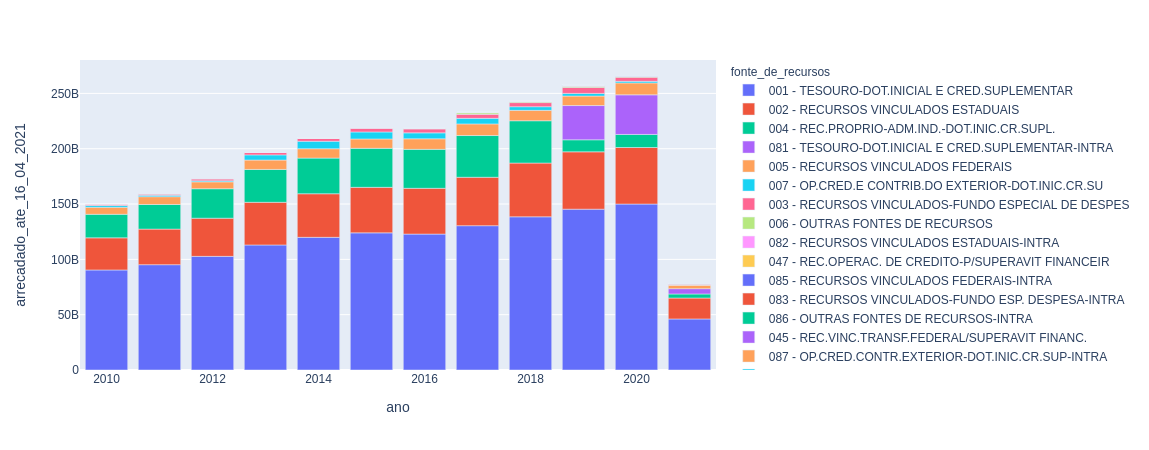

time: 115 ms (started: 2021-04-20 14:49:57 -03:00)


In [90]:
px.bar(fontes_receita, x='ano', y='arrecadado_ate_16_04_2021', color='fonte_de_recursos')

In [91]:
# mask = df_receita['fonte_de_recursos'].str.contains('001 - ')

time: 47.2 ms (started: 2021-04-20 14:50:00 -03:00)


In [92]:
origem_receita = generic_group(
    df_receita, 
    group_cols=['ano','receita'],
    numeric_cols=['arrecadado_ate_16_04_2021'],
    sort_cols = ["arrecadado_ate_16_04_2021", "ano"]
)

time: 59.4 ms (started: 2021-04-20 14:50:00 -03:00)


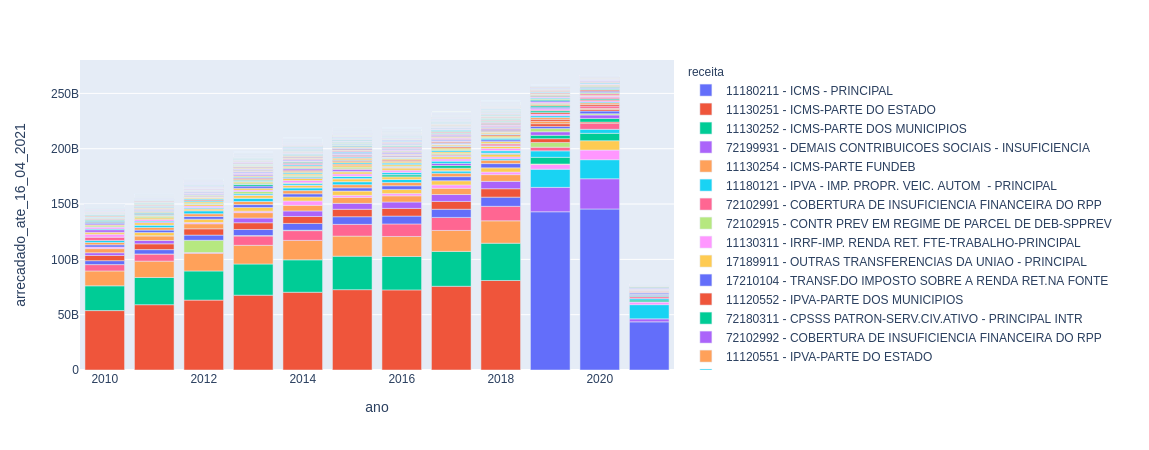

time: 4.45 s (started: 2021-04-20 14:50:01 -03:00)


In [93]:
px.bar(origem_receita, x='ano', y='arrecadado_ate_16_04_2021', color='receita')

### TAMOIOS

In [170]:
## '26782160624970000 - NOVA TAMOIOS - CONTORNOS',
## '26782160625050000 - APOIO A PPP RODOVIA TAMOIOS-SERRA'
mask = df_despesa['funcional_programatica'].isin(['26782160624970000 - NOVA TAMOIOS - CONTORNOS','26782160625050000 - APOIO A PPP RODOVIA TAMOIOS-SERRA'])
tamoios = df_despesa[mask]

time: 71.4 ms (started: 2021-04-20 16:47:50 -03:00)


In [179]:
tamoios.head(1)

,orgao,uo,unidade_gestora,fonte_de_recursos,funcao,sub_funcao,programa,acao,funcional_programatica,elemento,dotacao_inicial,dotacao_atual,empenhado,liquidado,pago,pago_restos,ano,grupo
16661,16000 - SECRETARIA DE LOGISTICA E TRANSPORTES,16055 - DEPARTAMENTO DE ESTRADAS DE RODAGEM-DER,162101 - DEPTO. ESTRADAS DE RODAGEM-DER,001 - TESOURO-DOT.INICIAL E CRED.SUPLEMENTAR,26 - TRANSPORTE,782 - TRANSPORTE RODOVIARIO,"1606 - AMPLIACAO, RECUPERACAO E MODERNIZACAO DA MALHA RODOVIARIA",24970000 - NOVA TAMOIOS - CONTORNOS,26782160624970000 - NOVA TAMOIOS - CONTORNOS,449051 - OBRAS E INSTALACOES,61000000.0,96000000.0,96000000.0,96000000.0,74532304.0,0.0,2014,INVESTIMENTOS


time: 61.5 ms (started: 2021-04-20 17:02:20 -03:00)


In [172]:
tamoios_ano = tamoios.groupby(by='ano', as_index=False).sum()

time: 52.9 ms (started: 2021-04-20 16:47:52 -03:00)


In [173]:
for col in tamoios_ano.columns:
    tamoios_ano[f"{col}_cumsum"] = tamoios_ano[col].cumsum()

time: 60.6 ms (started: 2021-04-20 16:47:53 -03:00)


In [174]:
tamoios_ano

,ano,dotacao_inicial,dotacao_atual,empenhado,liquidado,pago,pago_restos,ano_cumsum,dotacao_inicial_cumsum,dotacao_atual_cumsum,empenhado_cumsum,liquidado_cumsum,pago_cumsum,pago_restos_cumsum
0,2014,3.810010e+08,4.160010e+08,4.159991e+08,4.159991e+08,160304416.0,0.0,2014,3.810010e+08,4.160010e+08,4.159991e+08,4.159991e+08,1.603044e+08,0.0
1,2015,1.738000e+08,3.038347e+08,1.515329e+08,1.515329e+08,53890632.0,165900000.0,4029,5.548010e+08,7.198356e+08,5.675320e+08,5.675320e+08,2.141950e+08,165900000.0
2,2016,8.602000e+08,1.213369e+09,7.813314e+08,7.813314e+08,554131392.0,97479000.0,6045,1.415001e+09,1.933204e+09,1.348863e+09,1.348863e+09,7.683264e+08,263379008.0
3,2017,1.316958e+09,1.450437e+09,1.112312e+09,1.112312e+09,811584064.0,227200000.0,8062,2.731959e+09,3.383642e+09,2.461175e+09,2.461175e+09,1.579910e+09,490579008.0
4,2018,1.642000e+09,1.655515e+09,4.165812e+08,4.165812e+08,404105120.0,300727808.0,10080,4.373959e+09,5.039156e+09,2.877756e+09,2.877756e+09,1.984015e+09,791306816.0
5,2019,1.834920e+09,1.800452e+09,7.262979e+08,7.262979e+08,689530112.0,12283522.0,12099,6.208879e+09,6.839609e+09,3.604054e+09,3.604054e+09,2.673546e+09,803590336.0
6,2020,9.263144e+08,9.187752e+08,4.734858e+08,4.734858e+08,472105792.0,5723158.5,14119,7.135194e+09,7.758384e+09,4.077540e+09,4.077540e+09,3.145651e+09,809313472.0
7,2021,2.362467e+08,4.373459e+08,2.010992e+08,2.010992e+08,201099184.0,0.0,16140,7.371440e+09,8.195730e+09,4.278639e+09,4.278639e+09,3.346751e+09,809313472.0


time: 64.9 ms (started: 2021-04-20 16:47:54 -03:00)


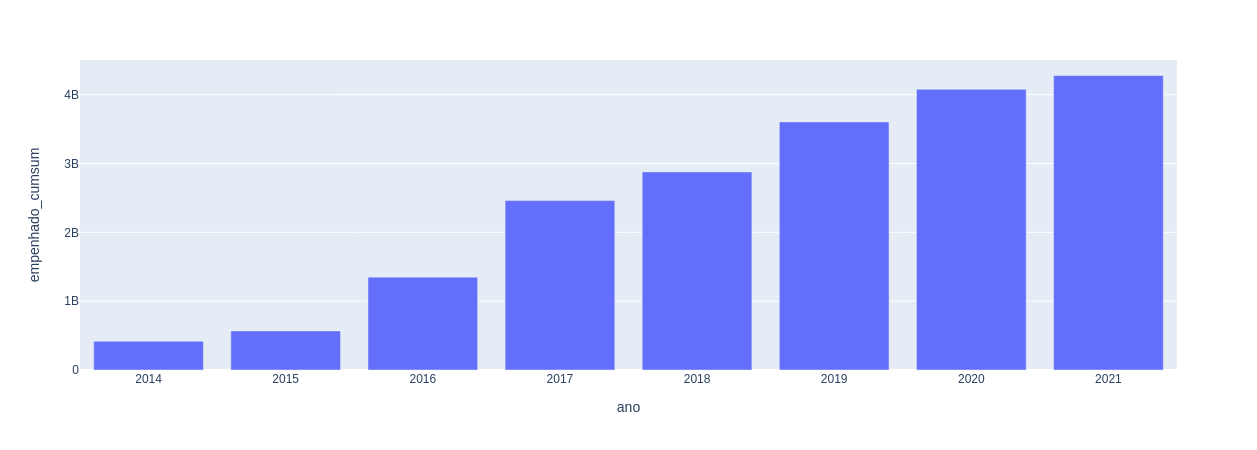

time: 78.7 ms (started: 2021-04-20 16:47:55 -03:00)


In [175]:
px.bar(tamoios_ano,x='ano', y='empenhado_cumsum')

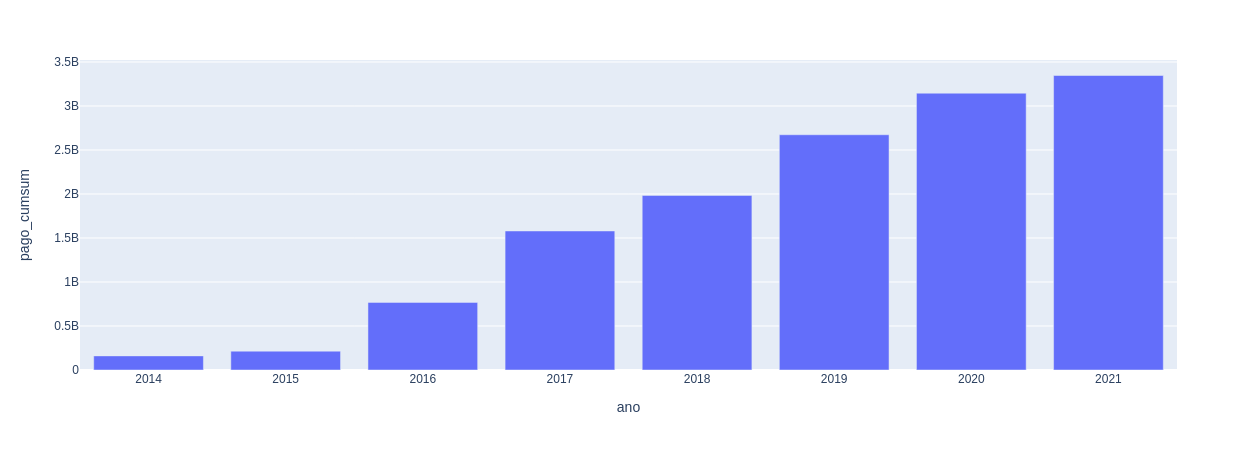

time: 76.8 ms (started: 2021-04-20 16:48:08 -03:00)


In [176]:
px.bar(tamoios_ano,x='ano', y='pago_cumsum')

time: 64.1 ms (started: 2021-04-20 14:46:11 -03:00)


In [69]:
df_receita['id_receita']

0       17210104
1       19220701
2       19909909
3       19900201
4       13119901
          ...   
1034    19901211
1035    76100111
1036    13210011
1037    19901221
1038    19909911
Name: id_receita, Length: 27516, dtype: object

time: 50.6 ms (started: 2021-04-20 14:46:14 -03:00)


In [32]:
len(df_receita['receita'].unique())

641

time: 23.9 ms (started: 2021-04-20 11:01:36 -03:00)


In [31]:
len(df_receita['receita'].apply(lambda x: x.split('-')[0].strip()).unique())

634

time: 34.2 ms (started: 2021-04-20 11:01:25 -03:00)


In [120]:
df_orcamento.groupby(by=['ano'],as_index=False).sum()[['ano','dotacao_inicial']].sort_values(by='ano', ascending=False)

,ano,dotacao_inicial
11,2021,2.772163e+11
10,2020,2.697748e+11
9,2019,2.608308e+11
8,2018,2.459258e+11
7,2017,2.342283e+11
6,2016,2.341096e+11
5,2015,2.310481e+11
4,2014,2.121914e+11
3,2013,1.928443e+11
2,2012,1.740679e+11


time: 120 ms (started: 2021-04-19 14:45:28 -03:00)


In [130]:
df_orcamento['funcao'].unique()

array(['01 - LEGISLATIVA', '02 - JUDICIARIA', '12 - EDUCACAO',
       '10 - SAUDE', '19 - CIENCIA E TECNOLOGIA',
       '23 - COMERCIO E SERVICOS', '13 - CULTURA',
       '09 - PREVIDENCIA SOCIAL', '20 - AGRICULTURA', '26 - TRANSPORTE',
       '14 - DIREITOS DA CIDADANIA', '21 - ORGANIZACAO AGRARIA',
       '08 - ASSISTENCIA SOCIAL', '06 - SEGURANCA PUBLICA',
       '04 - ADMINISTRACAO', '28 - ENCARGOS ESPECIAIS', '11 - TRABALHO',
       '16 - HABITACAO', '18 - GESTAO AMBIENTAL',
       '03 - ESSENCIAL A JUSTICA', '17 - SANEAMENTO', '25 - ENERGIA',
       '27 - DESPORTO E LAZER', '24 - COMUNICACOES',
       '99 - RESERVA DE CONTINGENCIA', '22 - INDUSTRIA', '15 - URBANISMO'],
      dtype=object)

time: 58 ms (started: 2021-04-19 14:55:39 -03:00)


In [131]:
### elementos da previdencia
funcoes_interesse = [
    '10 - SAUDE',
    '12 - EDUCACAO',
    '19 - CIENCIA E TECNOLOGIA',
    '09 - PREVIDENCIA SOCIAL',
    '06 - SEGURANCA PUBLICA',
]
mask = df_orcamento['funcao'].isin(funcoes_interesse)
df_orcamento[mask].groupby(by=['ano','funcao'],as_index=False).sum()[['ano','funcao','dotacao_inicial']].sort_values(by=['funcao','ano'], ascending=False)

,ano,funcao,dotacao_inicial
59,2021,19 - CIENCIA E TECNOLOGIA,1.513406e+09
54,2020,19 - CIENCIA E TECNOLOGIA,1.965812e+09
49,2019,19 - CIENCIA E TECNOLOGIA,1.877747e+09
44,2018,19 - CIENCIA E TECNOLOGIA,1.706173e+09
39,2017,19 - CIENCIA E TECNOLOGIA,1.641950e+09
34,2016,19 - CIENCIA E TECNOLOGIA,1.587571e+09
29,2015,19 - CIENCIA E TECNOLOGIA,1.516750e+09
24,2014,19 - CIENCIA E TECNOLOGIA,1.436620e+09
19,2013,19 - CIENCIA E TECNOLOGIA,1.447495e+09
14,2012,19 - CIENCIA E TECNOLOGIA,1.388150e+09


time: 150 ms (started: 2021-04-19 14:55:50 -03:00)


In [141]:
grupo = {
    '31' : 'PESSOAL E ENCARGOS SOCIAIS',
    '32' : 'JUROS E ENCARGOS DA DIVIDA',
    '33' : 'OUTRAS DESPESAS CORRENTES',
    '44' : 'INVESTIMENTOS',
    '45' : 'INVERSOES FINANCEIRAS',
    '46' : 'AMORTIZACAO DE DIVIDA',
    '99' : 'RESERVA DE CONTINGENCIA'
}

df_orcamento['grupo'] = df_orcamento['elemento'].apply(lambda x: x[:2]).replace(grupo)



df_orcamento.groupby(by=['ano','grupo'],as_index=False).sum()[['ano','grupo','dotacao_inicial']].sort_values(by=['grupo','ano'], ascending=False)

,ano,grupo,dotacao_inicial
84,2021,RESERVA DE CONTINGENCIA,5.100000e+07
77,2020,RESERVA DE CONTINGENCIA,4.999996e+07
70,2019,RESERVA DE CONTINGENCIA,5.000000e+07
63,2018,RESERVA DE CONTINGENCIA,4.650000e+07
56,2017,RESERVA DE CONTINGENCIA,2.000000e+07
49,2016,RESERVA DE CONTINGENCIA,1.000000e+07
42,2015,RESERVA DE CONTINGENCIA,1.000000e+07
35,2014,RESERVA DE CONTINGENCIA,1.000000e+07
28,2013,RESERVA DE CONTINGENCIA,1.000000e+07
21,2012,RESERVA DE CONTINGENCIA,1.000000e+07


time: 387 ms (started: 2021-04-19 15:03:01 -03:00)
